In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df = df.drop('Serial No.',axis=1)

In [5]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [8]:
df= df.rename(columns={"Chance of Admit ": "Chance of Admit"})
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

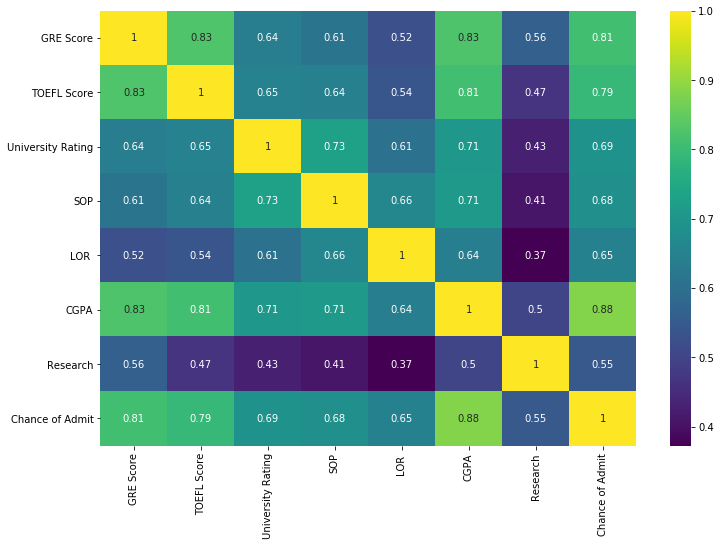

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

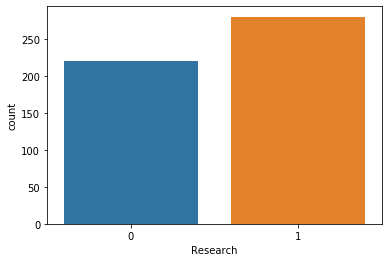

In [10]:
sns.countplot(x='Research',data=df)

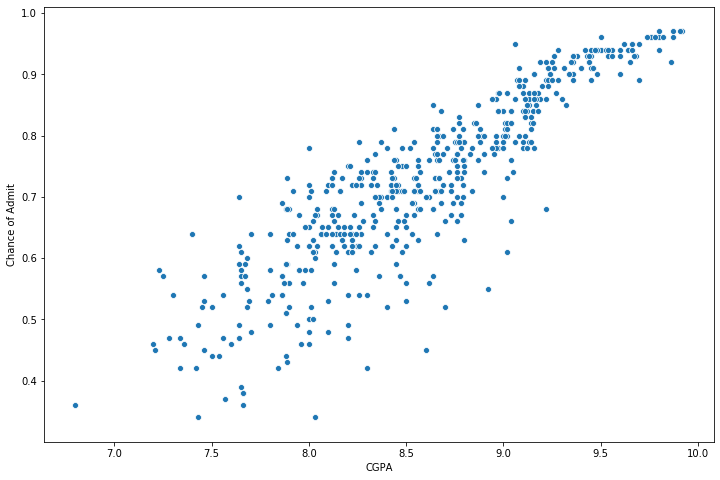

In [11]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df['CGPA'],y=df['Chance of Admit'])

In [12]:
df['CGPA'].argmax()

143

In [13]:
df.iloc[143]

GRE Score            340.00
TOEFL Score          120.00
University Rating      4.00
SOP                    4.50
LOR                    4.00
CGPA                   9.92
Research               1.00
Chance of Admit        0.97
Name: 143, dtype: float64

In [14]:
df[df['Chance of Admit'] == 0.97]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
24,336,119,5,4.0,3.5,9.80,1,0.97
143,340,120,4,4.5,4.0,9.92,1,0.97
202,340,120,5,4.5,4.5,9.91,1,0.97
203,334,120,5,4.0,5.0,9.87,1,0.97


In [15]:
df[df['Chance of Admit'] >= 0.95]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
23,334,119,5,5.0,4.5,9.70,1,0.95
24,336,119,5,4.0,3.5,9.80,1,0.97
71,336,112,5,5.0,5.0,9.76,1,0.96
81,340,120,4,5.0,5.0,9.50,1,0.96
130,339,114,5,4.0,4.5,9.76,1,0.96
143,340,120,4,4.5,4.0,9.92,1,0.97
148,339,116,4,4.0,3.5,9.80,1,0.96
202,340,120,5,4.5,4.5,9.91,1,0.97
203,334,120,5,4.0,5.0,9.87,1,0.97
212,338,120,4,5.0,5.0,9.66,1,0.95


In [16]:
df['Chance of Admit'].argmin()

92

In [17]:
df.iloc[92]

GRE Score            298.00
TOEFL Score           98.00
University Rating      2.00
SOP                    4.00
LOR                    3.00
CGPA                   8.03
Research               0.00
Chance of Admit        0.34
Name: 92, dtype: float64

In [18]:
df[df['Chance of Admit'] == 0.34]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
92,298,98,2,4.0,3.0,8.03,0,0.34
376,297,96,2,2.5,2.0,7.43,0,0.34


In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [21]:
X = df.drop('Chance of Admit',axis=1).values
y = df['Chance of Admit'].values

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()

In [25]:
X_train = scaler.fit_transform(X_train)

In [26]:
X_test = scaler.transform(X_test)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
reg = LinearRegression()

In [29]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)